In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [2]:
import Operators as op
import SensingMatrix as sm
import Measurements as me
from SetUpImage import setUpImage
from Displays import phase_retrie_plots


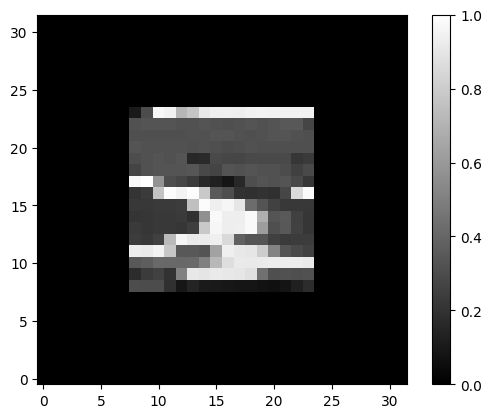

In [3]:
Nx, Ny = 32, 32
n = Nx * Ny
#true_images = setUpImage(Nx, Ny)
s = setUpImage(Nx, Ny)

true_images, mask = s()



#map.f(x_true) < 1e-5
len(true_images)
plt.imshow(true_images[-1].imag, cmap='gray', origin='lower')
plt.colorbar()

In [4]:
x_true = true_images[0]
x_true_vect = x_true.reshape(Nx * Ny, )

#print("x_true_vect", x_true_vect)
#x = (1 + 2j)*np.ones(x_true_vect.shape)

#noise_lvl = 0.e-4
A = sm.FourierMatrix(Nx,Ny) #sm.iid_stdd_Gauss(Nx,Ny)


#print(np.linalg.norm(A.Matrix @ np.conj(A.Matrix).T - np.conj(A.Matrix).T @ A.Matrix))
#print("A.Matrix", A.Matrix)
#meas, noise = me.gauss_noisy_meas(x_true_vect, noise_lvl , A)()
#map = op.operators(algo = 'complex mirror', meas = meas, A = A)
#map.f( x)
#print(map.psi(2 * x), map.psi(1 * x), map.breg_psi(2 * x, x))

In [5]:
A_pinv = np.linalg.pinv(A.Matrix)

In [6]:
import solve

In [7]:
# X = A.Matrix @ np.conjugate(x_true_vect)
# Xa = A.Matrix @ ((A_pinv) @ X)
# print(np.linalg.norm(X - Xa))

iteration k 0
iteration k 0


c:\Users\sefojere\AppData\Local\miniconda3\envs\firstenv\lib\site-packages\matplotlib\cbook\__init__.py:1345: ComplexWarning: Casting complex values to real discards the imaginary part
  return np.asarray(x, float)


IndexError: list index out of range

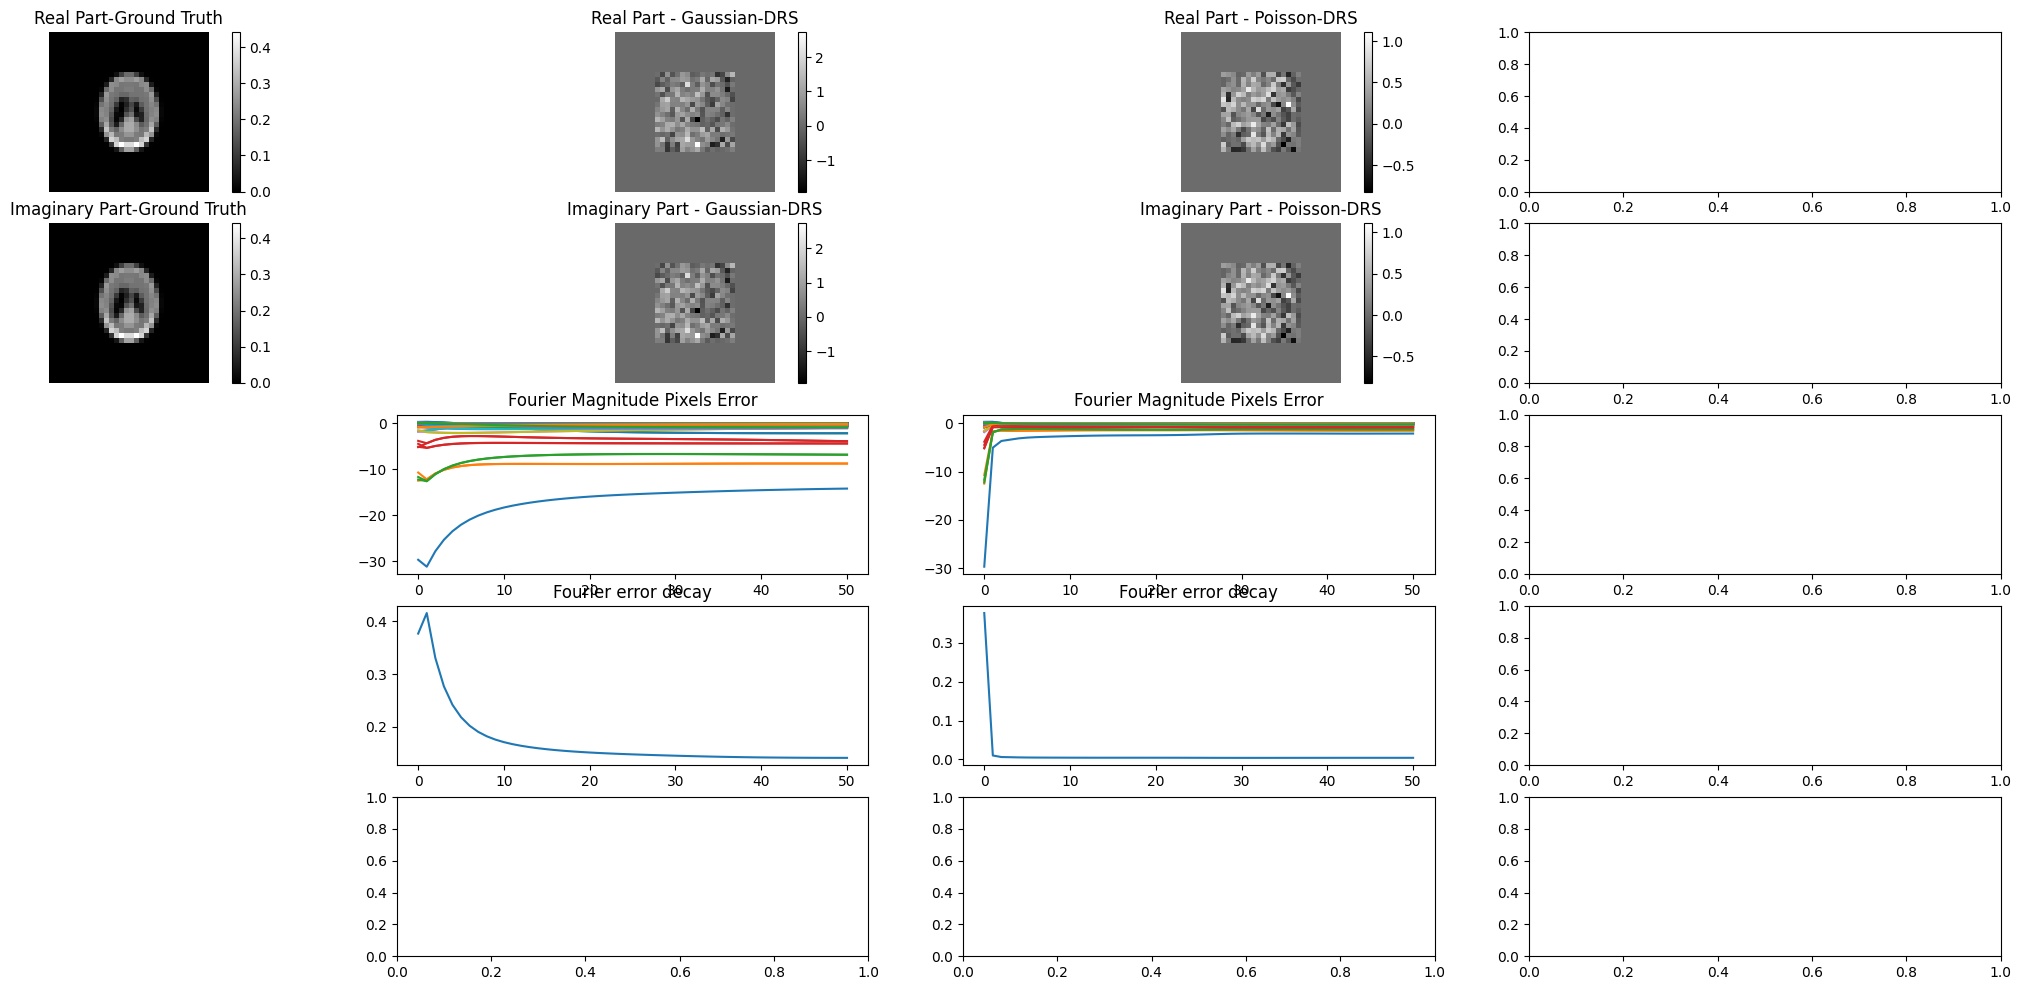

In [8]:
idx = [2]#np.arange(len(true_images)) #[0, 1] # np.arange(1) 
Algos_group = []
Algos = ['Error Reduction', 'Output-Output', 'Hybrid Input-Output'  ] #'No Support prior', 'Gerchberg-Saxton', 'Error Reduction', 'real mirror', 'complex mirror', 
#Algos_group.append(Algos)
Algos = [ 'No Support prior + TV-support', 'No Support prior + TV-support real_imag_separated', 'Error Reduction + TV-support' ] #, 'Gerchberg-Saxton + TV-support', 'Error Reduction + TV-support' #TV-support alsmost kills the real part and make Gerchberg-Saxton worse
#Algos_group.append(Algos)
Algos = [  'Gaussian-DRS', 'Poisson-DRS' ] #'basic Input-Output', 'Output-Output','Peaceman-Rachford', 'Averaged Alternating Reflections',
Algos_group.append(Algos)

Algos = ['real mirror', 'complex mirror' ] 
#Algos_group.append(Algos)
for Algos in Algos_group:
    for i in idx:
        X_sols = []
        x_true = true_images[i]
        x_true_vect = x_true.reshape(Nx * Ny, )
        maxiter = 50
        kappa  = 0.9
        xi = 12
        noise_lvl = 1.e-0
        meas, noise = me.gauss_noisy_meas(x_true_vect, noise_lvl , A)()
        L = 1 * op.smoothnessPara_L(A.Matrix, noise)
        #print("meas", meas)
        x0 = op.initialise(n, meas, A.Matrix, type ='Gaussian', real = 1, imag = 1, x_true_vect = x_true_vect, mask = mask, noise_lvl = noise_lvl**(0.5) )
        for Algo in Algos:
            map = op.operators(algo = Algo, meas = meas, A = A) 
            x_sols, space = solve.phase_retrieval(L, kappa, xi, Algo, map, mask, n, A.Matrix, A_pinv, meas, maxiter, x0, x_true_vect, IO_OO_HIO_beta = [1, 1., 0.1], TvIter = 10, TvAlpha = 0.001, rho_Gau_Poi = [1., 0.] )
            X_sols.append(x_sols)
        phase_retrie_plots(i, true_images, X_sols, map, A, meas, maxiter, space, Algos)

iteration k 0
iteration k 0
iteration k 0
iteration k 0
iteration k 0


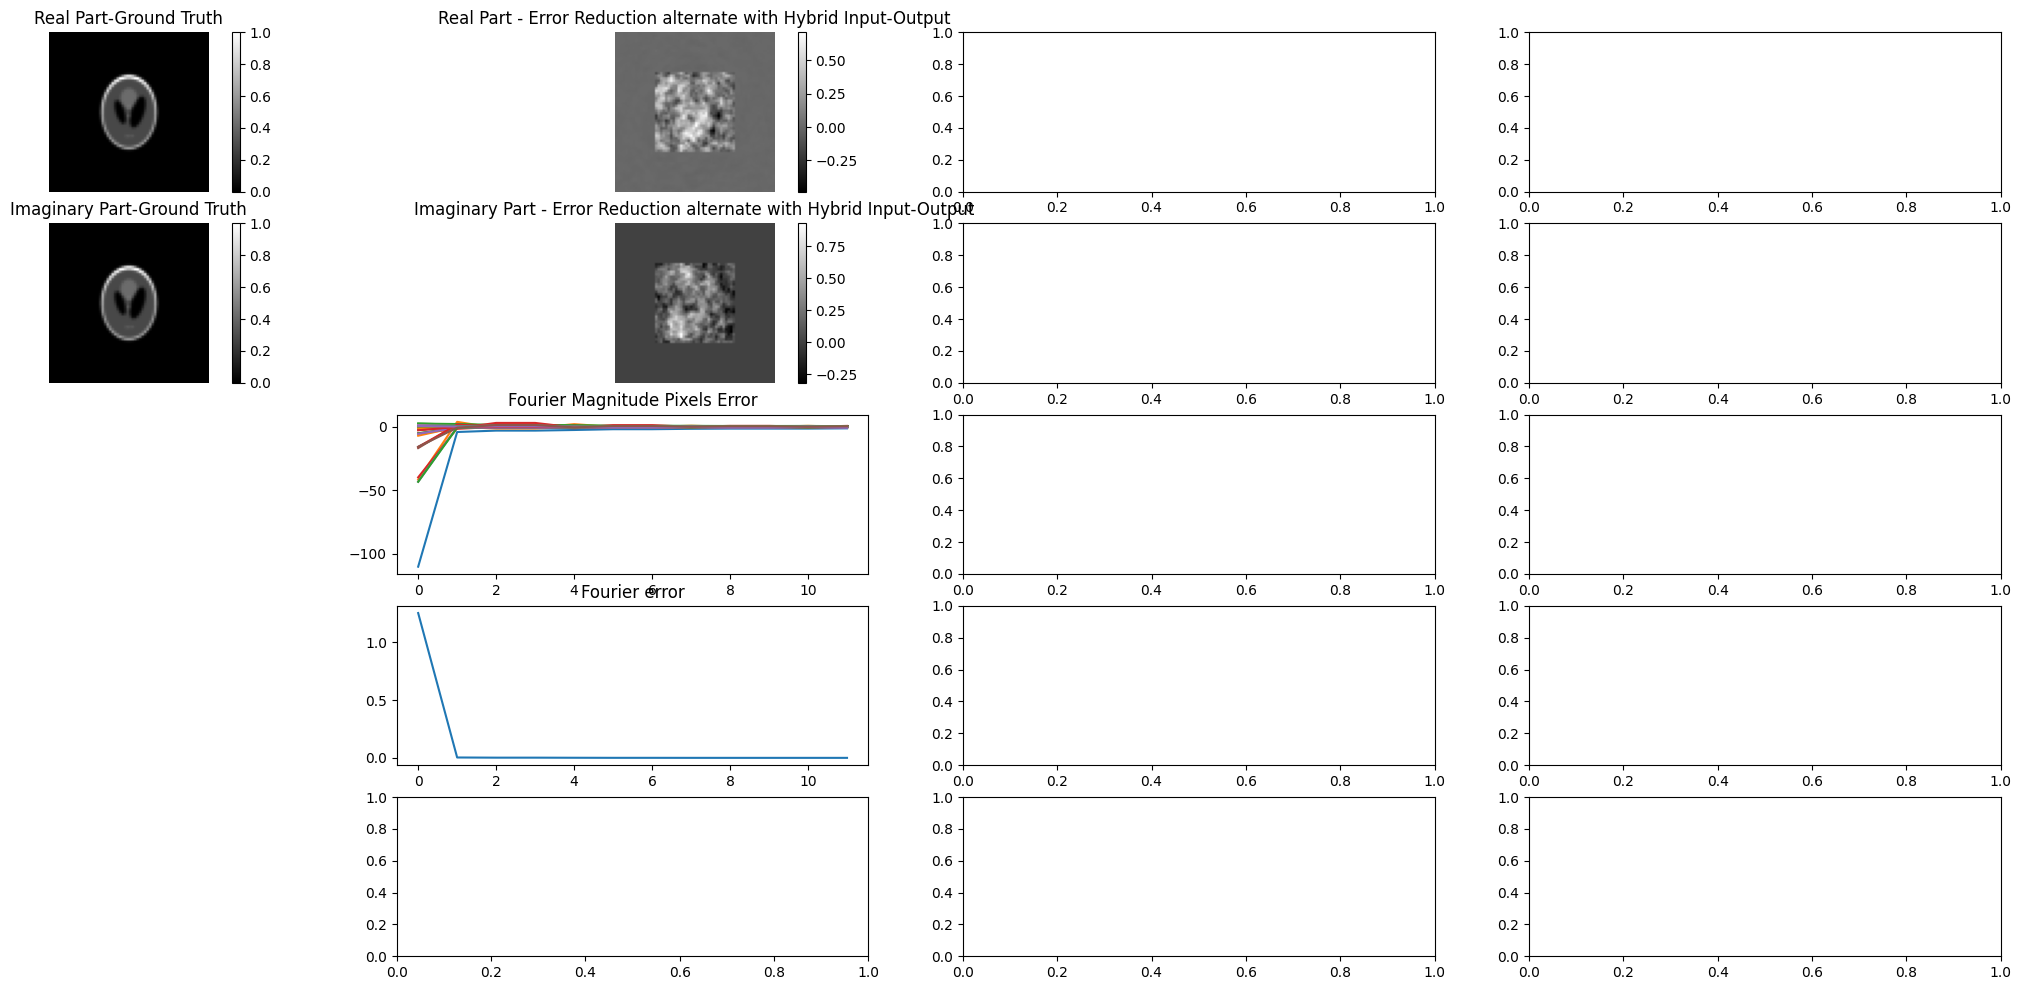

In [ ]:
from DisplayAlternate import phase_retrie_plots_alternate
idx = [3]#np.arange(len(true_images)) #[0, 1] # np.arange(1) 
Algos = [  'Error Reduction', 'Hybrid Input-Output' ]
for i in idx:
    X_sols = []
    x_true = true_images[i]
    x_true_vect = x_true.reshape(Nx * Ny, )
    maxiter = 2
    kappa  = 0.9
    xi = 12
    noise_lvl = 1.e-4
    meas, noise = me.gauss_noisy_meas(x_true_vect, noise_lvl , A)()
    L = 1 * op.smoothnessPara_L(A.Matrix, noise)
    #print("meas", meas)
    #Sols_list = []
    x0 = op.initialise(n, meas, A.Matrix, type ='Gaussian', real = 1, imag = 1, x_true_vect = x_true_vect, mask = mask, noise_lvl = noise_lvl**(0.5) )
    for epoch in range(2):

        for Algo in Algos:
            map = op.operators(algo = Algo, meas = meas, A = A) 
            x_sols, space = solve.phase_retrieval(L, kappa, xi, Algo, map, mask, n, A.Matrix, A_pinv, meas, maxiter, x0, x_true_vect, IO_OO_HIO_beta = [1, 1., 0.1], TvIter = 5, TvAlpha = 1., rho = 1. )
            x0 = x_sols[-1]
            X_sols.extend(x_sols)
    x_sols, space = solve.phase_retrieval(L, kappa, xi, 'Error Reduction', map, mask, n, A.Matrix, A_pinv, meas, maxiter, x0, x_true_vect, IO_OO_HIO_beta = [1, 1., 0.1], TvIter = 5, TvAlpha = 1., rho = 1. )  
    #X_sols.append(Sols_list)
    phase_retrie_plots_alternate(i, true_images, X_sols, map, A, meas, maxiter, space, Algos)